#CODECHEF-VIT RECRUITMENTS 2025

#Step 0: Copy this notebook

**Guidelines**:
*   Make a copy of this notebook in your Google Drive
*   Submit the editted colab notebook as your final submission



#Step 1: Import the dataset

Guidelines: Run the code below to get the dataset

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
           "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
data = pd.read_csv(url, names=columns, skipinitialspace=True)
def standard_scalar(series):
  new_series=(series-series.mean())/series.std()
  return new_series

#Cleaning Data
data['native-country'].replace(" ?",np.nan,inplace=True)
data['workclass'].replace(" ?",np.nan,inplace=True)
data['occupation'].replace(" ?",np.nan,inplace=True)
data.dropna(inplace=True)
num_col=list(data.select_dtypes(include=['int','float']).columns)
data['sex']=data['sex'].map({'Male':0,'Female':1})
data['income']=data['income'].map({'<=50K':0,'>50K':1})
cat_col=list(data.select_dtypes(include='object').columns)
dummies_data=pd.get_dummies(data[cat_col],drop_first=True)
data.drop(columns=cat_col,inplace=True)
data=pd.concat([data,dummies_data],axis=1)
#Splitting Dataset
X = data.drop(columns = 'income')
y = data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
norm_x_train=X_train
norm_x_test=X_test
norm_x_train[num_col]=X_train[num_col].apply(standard_scalar,axis=0)
norm_x_test[num_col]=X_test[num_col].apply(standard_scalar,axis=0)
data

<ipython-input-28-6462e13ec547>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['native-country'].replace(" ?",np.nan,inplace=True)
<ipython-input-28-6462e13ec547>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,0,2174,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,0,13,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,1,0,0,38,0,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,40,154374,9,0,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,58,151910,9,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,22,201490,9,0,0,0,20,0,False,False,...,False,False,False,False,False,False,False,True,False,False


#Step 2: Import Libraries

**Guidelines**: Import the necessary libraries

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score
#Logistic Regression
d={}
for i in range(1,len(X_train.columns)+1):
  lr=LogisticRegression()
  rfe=RFE(lr,n_features_to_select=i)
  rfe.fit(norm_x_train,y_train)
  rfe_feature=norm_x_train.columns[rfe.support_]
  rfe_x_train=norm_x_train[rfe_feature]
  lr=LogisticRegression()
  lr.fit(rfe_x_train,y_train)
  test_pred=lr.predict(norm_x_test[rfe_feature])
  f1_array=f1_score(y_test,test_pred,average=None)
  d[i]={'Features':rfe_feature,'f1_score':f1_array}
pd.options.display.max_colwidth = 100
f1_df=pd.DataFrame.from_dict(d,orient='index')

lr=LogisticRegression()
rfe=RFE(lr,n_features_to_select=3)
rfe.fit(norm_x_train,y_train)
rfe_feature=norm_x_train.columns[rfe.support_]
rfe_x_train=norm_x_train[rfe_feature]
lr=LogisticRegression()
lr.fit(rfe_x_train,y_train)
test_pred=lr.predict(norm_x_test[rfe_feature])

f1_array=f1_score(y_test,test_pred)
print(rfe_feature,f1_array)
print(confusion_matrix(y_test,test_pred))


Index(['capital-gain', 'marital-status_Married-civ-spouse',
       'relationship_Own-child'],
      dtype='object') 0.32365995220211674


In [31]:
#Testing Accuracy of Logistic Regression

print(confusion_matrix(y_test,test_pred))
print(classification_report(y_test,test_pred))

[[7314  141]
 [1840  474]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      7455
           1       0.77      0.20      0.32      2314

    accuracy                           0.80      9769
   macro avg       0.78      0.59      0.60      9769
weighted avg       0.79      0.80      0.75      9769



In [32]:
from sklearn.svm import SVC
#Support Vector Machines
svc=SVC(kernel='linear')

svc.fit(norm_x_train,y_train)
print(svc.score(norm_x_train,y_train))
train_pred=pd.Series(svc.predict(norm_x_train))
train_pred.value_counts()
test_pred=pd.Series(svc.predict(norm_x_test))

#Testing Accuracy of SVM
print(confusion_matrix(y_test,test_pred))
print(classification_report(y_test,test_pred))

0.8529308529308529
[[6993  462]
 [ 973 1341]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7455
           1       0.74      0.58      0.65      2314

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.85      0.85      0.85      9769



              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7455
           1       0.77      0.49      0.60      2314

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7455
           1       0.77      0.49      0.60      2314

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



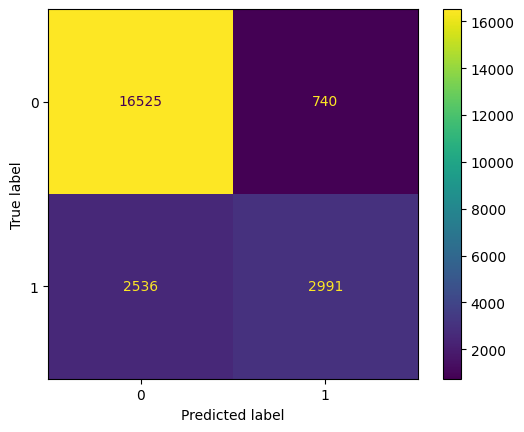

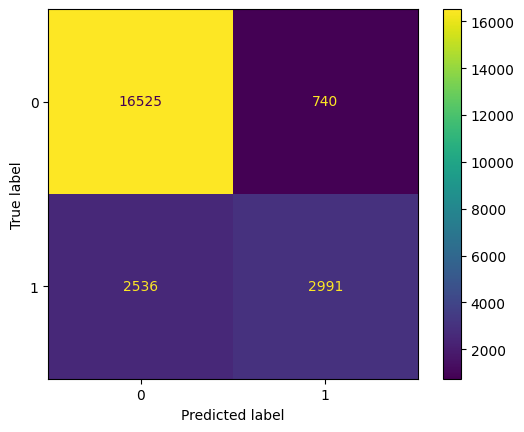

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
#Decision Tree Classifier


param={'max_depth':np.arange(2,10),'min_samples_split':np.arange(5,10),'min_samples_leaf':np.arange(5,10),'random_state':[20],'criterion':['gini','entropy']}
gsc=GridSearchCV(DecisionTreeClassifier(),param,scoring='accuracy',n_jobs=-1)
gsc.fit(norm_x_train,y_train)
gsc.best_estimator_

dtc=DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=7,min_samples_split=5, random_state=20)
dtc.fit(norm_x_train,y_train)
test_pred=dtc.predict(norm_x_test)
metrics.accuracy_score(y_test,test_pred)

#Testing Accuracy of DTC
ConfusionMatrixDisplay.from_estimator(dtc, norm_x_train, y_train, values_format='d')
print(classification_report(y_test,test_pred))

#Step 4: Results and Inferences

**Guidelines**: List out your inferences here

Even though **Support Vector Machines (SVM)** may provide the most accurate predictions in a given scenario, there are still justifiable reasons to use **Logistic Regression** and **Decision Tree Classifier**, depending on factors like interpretability, computational efficiency, and dataset characteristics. Here's why each model is useful:

---

### **1. Logistic Regression**  
**Best for:** Simplicity, interpretability, and probability estimation  

✅ **Why use Logistic Regression?**  
- **Interpretable:** Provides clear insights into feature importance via coefficients.  
- **Probability Estimates:** Outputs probabilities, useful for decision-making (e.g., in medical diagnosis).  
- **Efficient for Large Datasets:** Computationally fast and scales well with high-dimensional data.  
- **Works Well with Linearly Separable Data:** If the decision boundary is linear, Logistic Regression can perform comparably to SVM but with less complexity.  

🚫 **Limitations:**  
- Struggles with non-linear relationships (unless using feature transformations).  
- Less powerful for complex patterns compared to SVM and Decision Trees.  

---

### **2. Support Vector Machines (SVM)**  
**Best for:** High accuracy in small-to-medium datasets with clear class boundaries  

✅ **Why use SVM?**  
- **Effective in High-Dimensional Spaces:** Works well even when the number of features is large.  
- **Robust to Overfitting (with proper tuning):** Uses margin maximization for better generalization.  
- **Can Handle Non-Linearity (via Kernel Trick):** Useful when data is not linearly separable.  

🚫 **Limitations:**  
- Computationally expensive for large datasets.  
- Less interpretable compared to Logistic Regression or Decision Trees.  
- Requires careful tuning of hyperparameters (e.g., kernel choice, C, gamma).  

---

### **3. Decision Tree Classifier**  
**Best for:** Interpretability, handling non-linearity, and feature importance analysis  

✅ **Why use Decision Trees?**  
- **Easy to Interpret:** A visual tree structure makes it intuitive for understanding decision-making.  
- **Captures Non-Linear Relationships:** Unlike Logistic Regression, Decision Trees can model complex patterns.  
- **Works Well with Missing Values:** Can handle datasets with missing data without requiring imputation.  
- **Feature Importance Analysis:** Identifies which variables are most important for predictions.  

🚫 **Limitations:**  
- **Prone to Overfitting:** Without pruning or depth control, Decision Trees can become too complex.  
- **Sensitive to Noisy Data:** Small variations in data can lead to large structural changes.  

---

### **Final Justification & Model Choice**
- If you **need interpretability and probability estimation**, go with **Logistic Regression**.  
- If **accuracy is the top priority and computational resources allow**, use **SVM**.  
- If **you need a model that captures non-linear relationships and provides feature importance**, choose **Decision Trees**.  

Each model has its strengths and weaknesses, so the best choice depends on the **dataset, computational constraints, and the need for interpretability**.

